# Linear Regression Practicals on Stock Prediction Dataset

## Practical 1: Simple Linear Regression
- Dataset: Stock Closing Prices (e.g., TVSMOTOR.NS)
- Feature: Day number (time index)
- Target: Closing Price
- Task: Fit a simple regression line and evaluate using MSE, RMSE, R²

In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 1.6 MB/s eta 0:00:01
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
     |████████████████████████████████| 2.8 MB 65.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 54.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 249 kB 44.5 MB/s eta 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Download stock data
data = yf.download("TVSMOTOR.NS", start="2022-01-01", end="2025-08-01")

data.reset_index(inplace=True)

/var/folders/26/ff0xxzbd731d59yvrvgz3jgm0000gn/T/ipykernel_46325/3135455926.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TVSMOTOR.NS", start="2022-01-01", end="2025-08-01")
[*********************100%***********************]  1 of 1 completed


In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS
0,2022-01-03,617.294006,620.923717,604.590049,613.124758,1188070
1,2022-01-04,618.471252,623.474327,614.596292,619.010790,574936
2,2022-01-05,626.564453,631.959951,617.441169,620.776532,1056096
3,2022-01-06,636.570618,637.649693,618.029703,622.934700,1042775
4,2022-01-07,628.869812,641.573769,625.142025,638.483597,715951
...,...,...,...,...,...,...
880,2025-07-25,2774.399902,2799.899902,2728.699951,2797.699951,909208
881,2025-07-28,2798.899902,2832.800049,2750.000000,2774.399902,601547
882,2025-07-29,2801.800049,2825.000000,2784.899902,2790.000000,820647


MSE: 32638.47575303454
RMSE: 180.66121817654874
R²: 0.9412998075463679


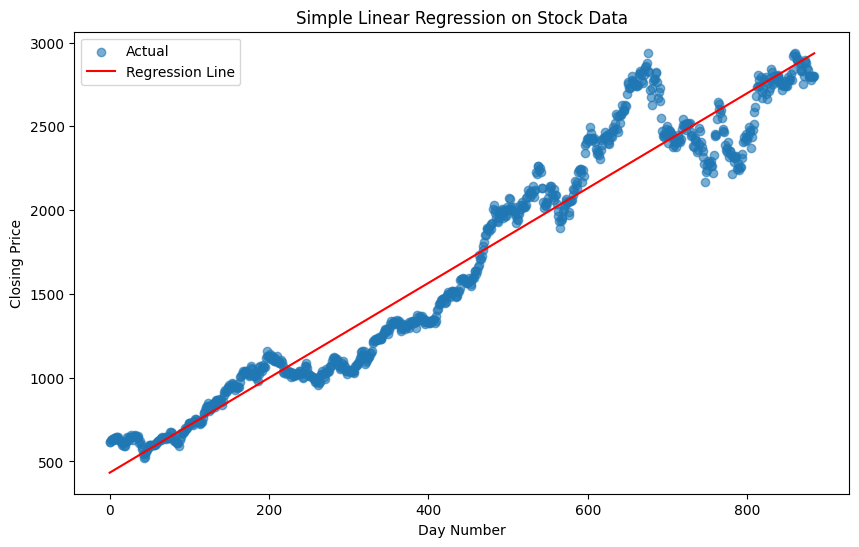

In [7]:



# Feature: day number, Target: closing price

data['Day'] = np.arange(len(data))
X = data[['Day']]
y = data['Close']

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Actual", alpha=0.6)
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("Day Number")
plt.ylabel("Closing Price")
plt.legend()
plt.title("Simple Linear Regression on Stock Data")
plt.show()


## Practical 2: Gradient Descent Implementation
- Implement Linear Regression manually using Gradient Descent
- Visualize cost function convergence

/Users/jayantparmar/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/26/ff0xxzbd731d59yvrvgz3jgm0000gn/T/ipykernel_46325/3959314546.py:21: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(error**2)
/var/folders/26/ff0xxzbd731d59yvrvgz3jgm0000gn/T/ipykernel_46325/3959314546.py:19: RuntimeWarning: invalid value encountered in scalar subtract
  theta0 -= alpha * (1/m) * np.sum(error)
/var/folders/26/ff0xxzbd731d59yvrvgz3jgm0000gn/T/ipykernel_46325/3959314546.py:20: RuntimeWarning: invalid value encountered in multiply
  theta1 -= alpha * (1/m) * np.sum(error * X_norm.flatten())
/Users/jayantparmar/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Final Theta0: nan
Final Theta1: nan


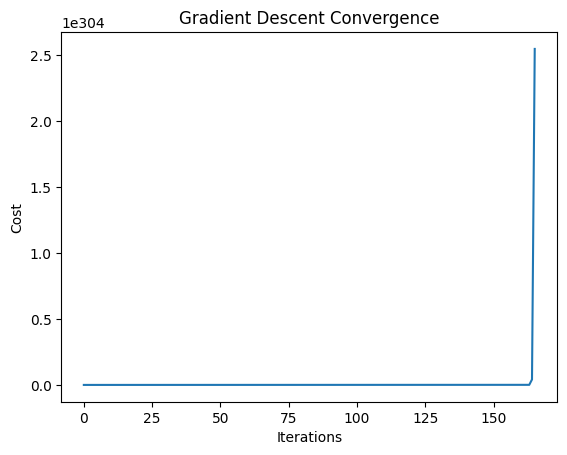

In [8]:

# Gradient Descent implementation for stock prices
X = data['Day'].values.reshape(-1,1)
y = data['Close'].values

# Normalize features
X_norm = (X - X.mean()) / X.std()

# Hyperparameters
alpha = 0.01
iterations = 1000
m = len(y)
theta0, theta1 = 0, 0

cost_history = []

for _ in range(iterations):
    y_pred = theta0 + theta1 * X_norm.flatten()
    error = y_pred - y
    theta0 -= alpha * (1/m) * np.sum(error)
    theta1 -= alpha * (1/m) * np.sum(error * X_norm.flatten())
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

print("Final Theta0:", theta0)
print("Final Theta1:", theta1)

# Plot cost convergence
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.show()


## Practical 3: Multivariate Linear Regression
- Features: Open, High, Low, Volume
- Target: Close
- Train Linear Regression and evaluate

In [9]:

features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

model_multi = LinearRegression()
model_multi.fit(X, y)
y_pred_multi = model_multi.predict(X)

mse_multi = mean_squared_error(y, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y, y_pred_multi)

print("Multivariate MSE:", mse_multi)
print("Multivariate RMSE:", rmse_multi)
print("Multivariate R²:", r2_multi)


Multivariate MSE: 159.1645694319306
Multivariate RMSE: 12.61604412769433
Multivariate R²: 0.9997137430397133


## Practical 4: Polynomial Regression
- Feature: Day number
- Compare Linear vs Polynomial Regression (degree 2, 3)

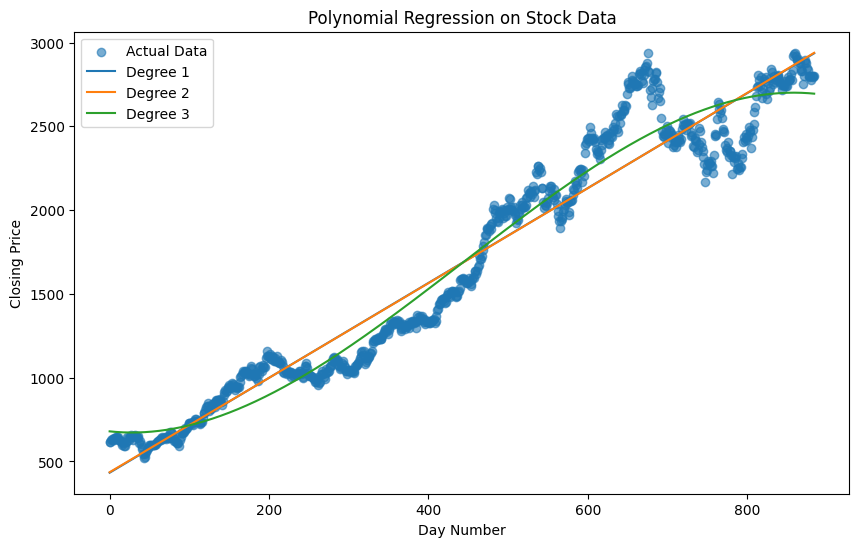

In [10]:

from sklearn.preprocessing import PolynomialFeatures

X = data[['Day']]
y = data['Close']

plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Actual Data", alpha=0.6)

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    y_poly_pred = model_poly.predict(X_poly)
    plt.plot(X, y_poly_pred, label=f"Degree {degree}")

plt.xlabel("Day Number")
plt.ylabel("Closing Price")
plt.title("Polynomial Regression on Stock Data")
plt.legend()
plt.show()


## Practical 5: Regularized Regression (Ridge & Lasso)
- Features: Open, High, Low, Volume
- Apply Ridge and Lasso regression

In [11]:

from sklearn.linear_model import Ridge, Lasso

features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X, y)
lasso.fit(X, y)

print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


Ridge Coefficients: [-4.76783126e-01  7.55523028e-01  7.21790385e-01 -4.79710415e-07]
Lasso Coefficients: [ 2.82866697e-01  5.78269642e-01  1.32533780e-01 -4.11132890e-07]


/Users/jayantparmar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.657e+05, tolerance: 4.921e+04
  model = cd_fast.enet_coordinate_descent(
